In [69]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

In [70]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/DABP Project/Data/Final Data/DF_NO_STATES.csv')
df = df.drop(columns=['nAllNeonic']) #sum of all pesticides

Mounted at /content/drive


In [71]:
# Set train and test set, test is anything beyond 2016
train = df[df['year'] < 2016]
test = df[df['year'] >= 2016]
X_train = train.drop(columns=['yieldpercol', 'year'])
y_train = train['yieldpercol']
X_test = test.drop(columns=['yieldpercol', 'year'])
y_test = test['yieldpercol']

# Normalize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler()
scaler2.fit(X_test)
X_test = scaler2.transform(X_test)

df = df.drop(columns=['yieldpercol', 'year']) #so we can use df.columns to call feature names

# Ridge

In [72]:
model_ridge = Ridge()
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(X_train, y_train)
    coef.append(model_ridge.coef_)
    errors_train.append(mean_squared_error(y_train,model_ridge.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_ridge.predict(X_test)))

Best alpha:  0.02072921779595372
Train MSE:  141.91895811922186
Test MSE:  157.94418527108127
Train RMSE:  11.912974360722089
Test RMSE:  12.567584703159206


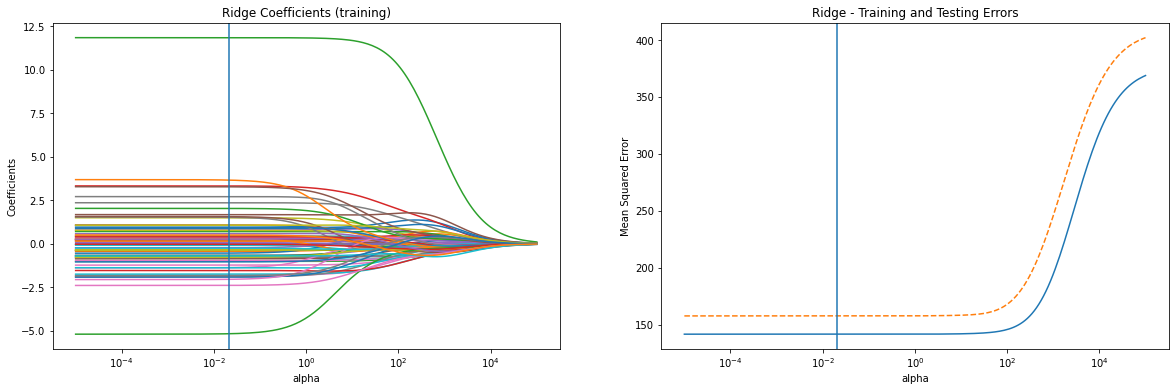

In [74]:
min_val_ridge = min(errors_test) #minimum cv
i = errors_test.index(min_val_ridge) #index of minimum cv

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge - Training and Testing Errors')
plt.axis('tight')

print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])
print("Train RMSE: ", math.sqrt(errors_train[i]))
print("Test RMSE: ", math.sqrt(errors_test[i]))

plt.show()

In [75]:
for j in range(len(coef[i])):
  print(df.columns[j], coef[i][j])

numcol 0.9554096130221421
nCLOTHIANIDIN 0.4688063444822974
nIMIDACLOPRID -1.0125006081313208
nTHIAMETHOXAM 0.2534669959014533
nACETAMIPRID 0.08762275914194216
nTHIACLOPRID 0.16999721669926343
prevyear_nCLOTHIANIDIN -1.8080147770641277
prevyear_nIMIDACLOPRID -0.7102667839727342
prevyear_nTHIAMETHOXAM 1.4979648721968093
prevyear_nACETAMIPRID -1.744258096823664
prevyear_nTHIACLOPRID -0.02248995393912453
NorthDakota_PrevYear -0.4311698382256522
prevyearyield 11.854325456263647
avg_temp 3.326600635528131
anomaly 0.794330592150758
varroa 0.23957090361807
spores 0.36532681392200844
cbpv_max 2.361424366284786
dwv_max 0.0
iapv_max -0.7903858637681944
kbv_max 0.8846579906363783
sbpv_max 0.0
abpv_max 0.7063860009578189
dwv-b_max -0.376671743142939
lsv2_max -0.6601702401689241
mkv_max 0.0
cbpv_prob -0.9771706332362705
dwv_prob -0.7835266208365889
iapv_prob 0.7758542357597336
kbv_prob 0.42577891956100516
sbpv_prob 0.0
abpv_prob 0.15915573319981716
dwv-b_prob -0.37667174314461815
lsv2_prob 0.2565490

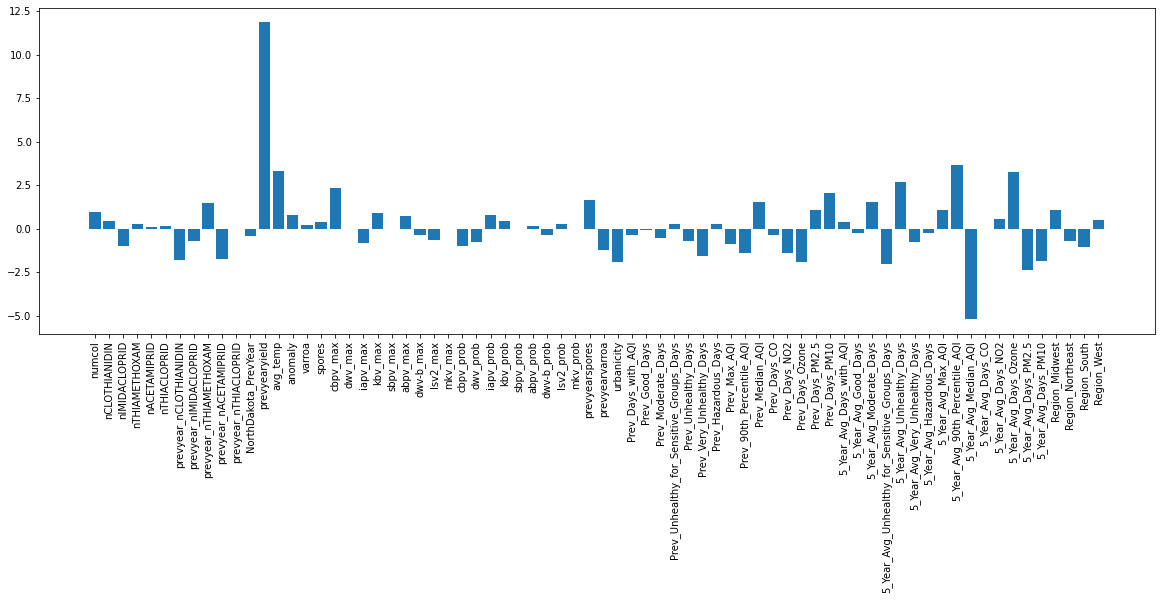

In [76]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns, coef[i])
plt.xticks(rotation=90)
plt.show()

# Lasso

In [77]:
model_lasso = Lasso(tol = 30)
coef = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(X_train, y_train)
    coef.append(model_lasso.coef_)
    errors_train.append(mean_squared_error(y_train,model_lasso.predict(X_train)))
    errors_test.append(mean_squared_error(y_test,model_lasso.predict(X_test)))

Best alpha:  0.8406652885618334
Train MSE:  157.51725605575885
Test MSE:  153.92885699877777
Train RMSE:  12.550587876898788
Test RMSE:  12.406806881658865


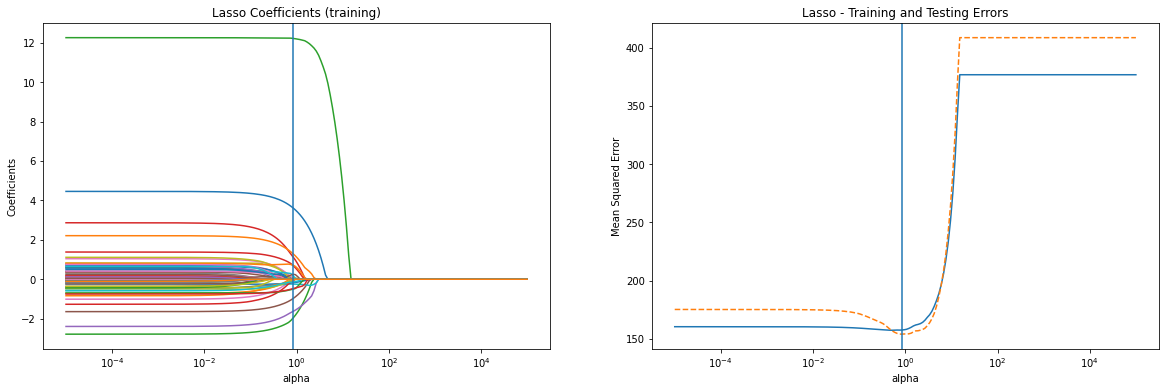

In [78]:
min_val_lasso = min(errors_test) #minimum cv
i = errors_test.index(min_val_lasso) #index of minimum cv

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coef)
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.axvline(alphas[i]) #corresponding alpha
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso - Training and Testing Errors')
plt.axis('tight')

print("Best alpha: ", alphas[i])
print("Train MSE: ", errors_train[i])
print("Test MSE: ", errors_test[i])
print("Train RMSE: ", math.sqrt(errors_train[i]))
print("Test RMSE: ", math.sqrt(errors_test[i]))

plt.show()

In [79]:
for j in range(len(coef[i])):
  print(df.columns[j], coef[i][j])

numcol 3.61891385361626
nCLOTHIANIDIN -0.0
nIMIDACLOPRID -1.9688631540934916
nTHIAMETHOXAM 1.1388407803146667
nACETAMIPRID -1.6333810358698069
nTHIACLOPRID -0.9789547504999103
prevyear_nCLOTHIANIDIN -0.0
prevyear_nIMIDACLOPRID -0.0
prevyear_nTHIAMETHOXAM 0.07810404505953035
prevyear_nACETAMIPRID -0.2450461622317297
prevyear_nTHIACLOPRID -0.17772264613276925
NorthDakota_PrevYear 1.2924150210871013
prevyearyield 12.227516683602667
avg_temp 0.6950660638368975
anomaly 0.0
varroa -0.0
spores 0.0
cbpv_max -0.0
dwv_max 0.0
iapv_max -0.0
kbv_max 0.0
sbpv_max 0.0
abpv_max 0.0
dwv-b_max -0.04971278994903773
lsv2_max -0.0
mkv_max 0.0
cbpv_prob -0.0
dwv_prob -0.08409386290171726
iapv_prob 0.0
kbv_prob 0.17949793570644001
sbpv_prob 0.0
abpv_prob 0.7136492413865537
dwv-b_prob -0.0
lsv2_prob 0.0
mkv_prob 0.0
prevyearspores 0.2544866195392515
prevyearvarroa -0.0
urbanicity -0.0
Prev_Days_with_AQI 0.0
Prev_Good_Days 0.0
Prev_Moderate_Days 0.0
Prev_Unhealthy_for_Sensitive_Groups_Days -0.0613387404323411

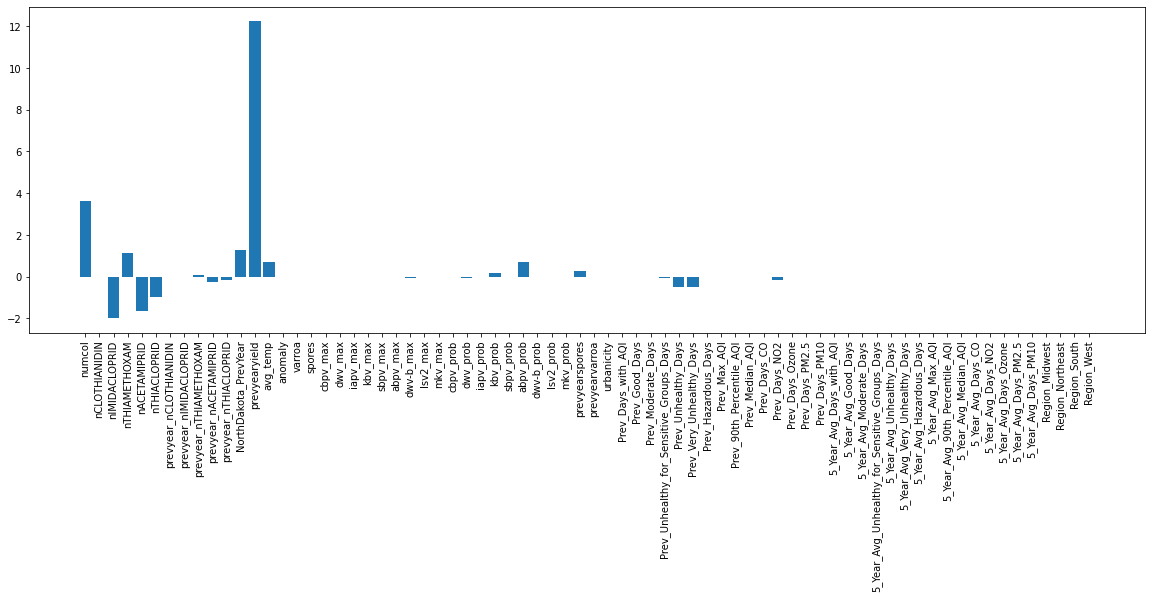

In [80]:
plt.figure(figsize=(20, 6))
plt.bar(df.columns, coef[i])
plt.xticks(rotation=90)
plt.show()